<a href="https://colab.research.google.com/github/chcorophyll/my_deeplearning_cookbook/blob/master/my_Detecting_Multiple_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 uninstall keras

Uninstalling Keras-2.2.4:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/Keras-2.2.4.dist-info/*
    /usr/local/lib/python3.6/dist-packages/docs/*
    /usr/local/lib/python3.6/dist-packages/keras/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.6/dist-packages/docs/md_autogen.py
    /usr/local/lib/python3.6/dist-packages/docs/update_docs.py
Proceed (y/n)? y
  Successfully uninstalled Keras-2.2.4


In [2]:
!pip3 install keras==2.1.6  -i http://pypi.douban.com/simple --trusted-host pypi.douban.com

Looking in indexes: http://pypi.douban.com/simple
     |████████████████████████████████| 348kB 441kB/s 


In [3]:
!git clone https://github.com/chcorophyll/deep_learning_cookbook.git

Cloning into 'deep_learning_cookbook'...
remote: Enumerating objects: 427, done.
remote: Total 427 (delta 0), reused 0 (delta 0), pack-reused 427
Receiving objects: 100% (427/427), 160.26 MiB | 26.60 MiB/s, done.
Resolving deltas: 100% (207/207), done.
Checking out files: 100% (86/86), done.


In [4]:
!ls

deep_learning_cookbook	sample_data


In [0]:
import os

path_org = os.getcwd()
path_data = os.path.join(path_org, "deep_learning_cookbook")
os.chdir(path_data)

In [6]:
!pip install imageio

In [7]:
from keras.applications import vgg16
from keras import backend as K
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Model, load_model
from keras.layers import Flatten, Dense, Input, TimeDistributed
import numpy as np
from collections import Counter, defaultdict
from keras.preprocessing import image
from PIL import ImageDraw
from PIL import Image

from imageio import imread, imwrite

try:
    from io import BytesIO
except ImportError:
    from StringIO import StringIO as BytesIO
import PIL
from IPython.display import clear_output, Image, display, HTML

Using TensorFlow backend.


In [0]:
def showarray(a, fmt="jpeg"):
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))
    
def preprocess_image(image_path, target_size=None):
    img = load_img(image_path, target_size=target_size)
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = vgg16.preprocess_input(img)
    return img

def deprocess_image(x, w, h):
    x = x.copy()
    if K.image_data_format() == 'channels_first':
        x = x.reshape((3, w, h))
        x = x.transpose((1, 2, 0))
    else:
        x = x.reshape((w, h, 3))
    # Remove zero-center by mean pixel
    x[:, :, 0] += 103.939
    x[:, :, 1] += 116.779
    x[:, :, 2] += 123.68
    # 'BGR'->'RGB'
    x = x[:, :, ::-1]
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [9]:
base_model = vgg16.VGG16(weights="imagenet", include_top=True)
base_model.summary()

W0707 07:11:20.056121 139721034205056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:68: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0707 07:11:20.106255 139721034205056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:508: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0707 07:11:20.113250 139721034205056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3837: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0707 07:11:20.160163 139721034205056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3661: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



553467904/553467096 [==============================] - 10s 0us/step


W0707 07:11:31.555943 139721034205056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:168: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0707 07:11:31.557448 139721034205056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:175: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [10]:
cat_dog = preprocess_image("data/cat_dog.jpg", target_size=(224, 224))
preds = base_model.predict(cat_dog)
print("Predicted:", vgg16.decode_predictions(preds, top=3)[0])

40960/35363 [==================================] - 0s 0us/step
Predicted: [('n02099601', 'golden_retriever', 0.099326335), ('n02100735', 'English_setter', 0.053414322), ('n02106662', 'German_shepherd', 0.048760593)]


In [0]:
cat_dog_img = image.load_img("data/cat_dog.jpg", target_size=(448, 448))
draw = ImageDraw.Draw(cat_dog_img)
draw.rectangle((192, 96, 416, 320), outline=(0, 0, 0))
draw.rectangle((0, 192, 224, 416), outline=(0, 0, 0))

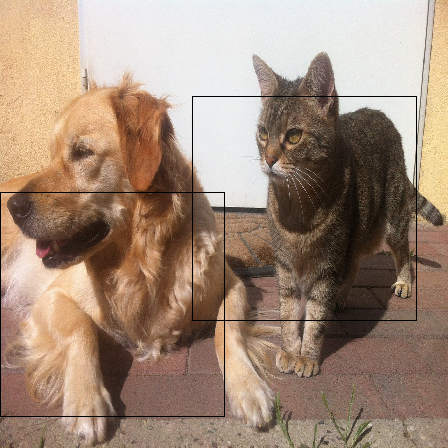

In [12]:
cat_dog_img

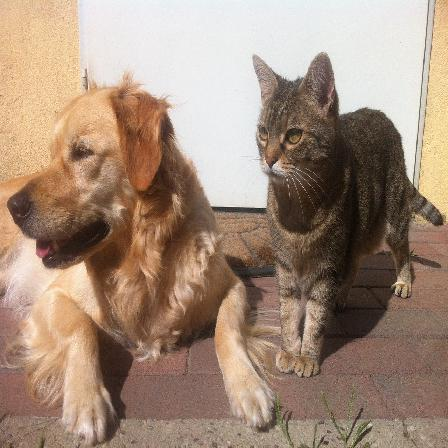

In [13]:
cat_dog2 = preprocess_image("data/cat_dog.jpg", target_size=(448, 448))
showarray(deprocess_image(cat_dog2, 448, 448))

In [14]:
cat_dog2.shape

(1, 448, 448, 3)

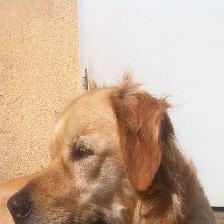

In [15]:
crops = []
for x in range(7):
    for y in range(7):
        crops.append(cat_dog2[0, x * 32: x * 32 + 224, y * 32: y * 32 + 224, :])
crops = np.asarray(crops)
showarray(deprocess_image(crops[0], 224, 224))

In [16]:
len(crops)

49

In [17]:
preds = base_model.predict(vgg16.preprocess_input(crops))
crop_scores = defaultdict(list)
for idx, pred in enumerate(vgg16.decode_predictions(preds, top=1)):
    _, label, weight = pred[0]
    crop_scores[label].append((idx, weight))
crop_scores.keys()

dict_keys(['Labrador_retriever', 'Norwegian_elkhound', 'tiger_cat', 'Egyptian_cat', 'tabby', 'kuvasz', 'flat-coated_retriever', 'standard_schnauzer'])

In [18]:
print(preds.shape)

(49, 1000)


In [19]:
vgg16.decode_predictions(preds, top=1)

[[('n02099712', 'Labrador_retriever', 0.32126272)],
 [('n02099712', 'Labrador_retriever', 0.39148748)],
 [('n02091467', 'Norwegian_elkhound', 0.44679028)],
 [('n02123159', 'tiger_cat', 0.40263566)],
 [('n02124075', 'Egyptian_cat', 0.47706452)],
 [('n02124075', 'Egyptian_cat', 0.3837812)],
 [('n02124075', 'Egyptian_cat', 0.43125737)],
 [('n02099712', 'Labrador_retriever', 0.22734813)],
 [('n02099712', 'Labrador_retriever', 0.27909958)],
 [('n02091467', 'Norwegian_elkhound', 0.6877907)],
 [('n02123159', 'tiger_cat', 0.35859194)],
 [('n02124075', 'Egyptian_cat', 0.40700755)],
 [('n02124075', 'Egyptian_cat', 0.28744993)],
 [('n02123045', 'tabby', 0.40705752)],
 [('n02104029', 'kuvasz', 0.34690088)],
 [('n02099712', 'Labrador_retriever', 0.42401767)],
 [('n02091467', 'Norwegian_elkhound', 0.5100472)],
 [('n02123045', 'tabby', 0.45274892)],
 [('n02123159', 'tiger_cat', 0.2998661)],
 [('n02124075', 'Egyptian_cat', 0.32872742)],
 [('n02124075', 'Egyptian_cat', 0.59207517)],
 [('n02099712', 'La

In [20]:
crop_scores

defaultdict(list,
            {'Egyptian_cat': [(4, 0.47706452),
              (5, 0.3837812),
              (6, 0.43125737),
              (11, 0.40700755),
              (12, 0.28744993),
              (19, 0.32872742),
              (20, 0.59207517),
              (25, 0.51182467),
              (26, 0.5445815),
              (27, 0.69989324),
              (32, 0.44910827),
              (33, 0.6496816),
              (34, 0.6172046),
              (39, 0.45941654),
              (40, 0.6156946),
              (41, 0.63603544),
              (47, 0.44582665),
              (48, 0.35049018)],
             'Labrador_retriever': [(0, 0.32126272),
              (1, 0.39148748),
              (7, 0.22734813),
              (8, 0.27909958),
              (15, 0.42401767),
              (21, 0.47168636),
              (22, 0.63923675),
              (23, 0.24093802),
              (28, 0.4941554),
              (29, 0.66704226)],
             'Norwegian_elkhound': [(2, 0.44679028),
      

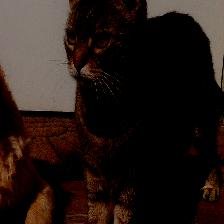

In [21]:
def best_image_for_label(l, label):
    idx = max(l[label], key=lambda t:t[1])[0]
    return deprocess_image(crops[idx], 224, 224)

showarray(best_image_for_label(crop_scores, 'Egyptian_cat'))

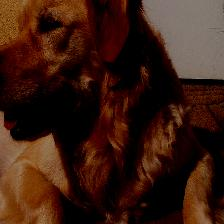

In [22]:
showarray(best_image_for_label(crop_scores, 'Labrador_retriever'))

In [23]:
def create_top_model(base_model):
    inputs = Input(shape=(7, 7, 512), name='input')
    flatten = Flatten(name='flatten')(inputs)
    fc1 = Dense(4096, activation='relu', name='fc1')(flatten)
    fc2 = Dense(4096, activation='relu', name='fc2')(fc1)
    predictions = Dense(1000, activation='softmax', name='predictions')(fc2)
    model = Model(inputs, predictions, name='top_model')
    for layer in model.layers:
        if layer.name != 'input':
            print(layer.name)
            layer.set_weights(base_model.get_layer(layer.name).get_weights())
    return model

top_model = create_top_model(base_model)
top_model.summary()

flatten
fc1
fc2
predictions
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 7, 7, 512)         0         
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
fc1 (Dense)                  (None, 4096)              102764544 
_________________________________________________________________
fc2 (Dense)                  (None, 4096)              16781312  
_________________________________________________________________
predictions (Dense)          (None, 1000)              4097000   
Total params: 123,642,856
Trainable params: 123,642,856
Non-trainable params: 0
_________________________________________________________________


In [24]:
bottom_model = vgg16.VGG16(weights="imagenet", include_top=False)
bottom_model.summary()

58892288/58889256 [==============================] - 1s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool

In [25]:
p0 = base_model.predict(crops[:1])
vgg16.decode_predictions(p0, top=1)

[[('n02099601', 'golden_retriever', 0.4088551)]]

In [26]:
b0 = bottom_model.predict(crops[:1])
t0 = top_model.predict(b0[:, :, :, :])
vgg16.decode_predictions(t0, top=1)

[[('n02099601', 'golden_retriever', 0.4088551)]]

In [27]:
cat_dog2.shape

(1, 448, 448, 3)

In [28]:
crops[:1].shape

(1, 224, 224, 3)

In [29]:
b0.shape

(1, 7, 7, 512)

In [30]:
bottom_out = bottom_model.predict(cat_dog2)
bottom_out.shape

(1, 14, 14, 512)

In [31]:
vec_crops = []
for x in range(7):
    for y in range(7):
        vec_crops.append(bottom_out[0, x:x+7, y:y+7, :])
vec_crops = np.asarray(vec_crops)
vec_crops.shape

(49, 7, 7, 512)

In [32]:
t1 = top_model.predict(vec_crops[:1])
vgg16.decode_predictions(t1, top=1)

[[('n02099601', 'golden_retriever', 0.3582282)]]

In [33]:
crop_pred = top_model.predict(vec_crops)
l = defaultdict(list)
for idx, pred in enumerate(vgg16.decode_predictions(crop_pred, top=1)):
    _, label, weight = pred[0]
    l[label].append((idx, weight))
l.keys()    

dict_keys(['golden_retriever', 'tennis_ball', 'tabby', 'tiger_cat', 'Rhodesian_ridgeback', 'Egyptian_cat', 'German_shepherd'])

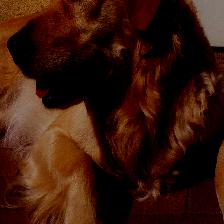

In [34]:
showarray(best_image_for_label(l, 'golden_retriever'))

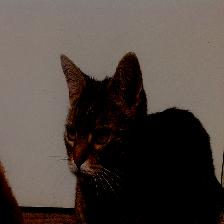

In [35]:
showarray(best_image_for_label(l, 'tabby'))

In [36]:
!git clone https://github.com/kbardool/keras-frcnn.git

Cloning into 'keras-frcnn'...
remote: Enumerating objects: 589, done.
remote: Total 589 (delta 0), reused 0 (delta 0), pack-reused 589
Receiving objects: 100% (589/589), 178.49 KiB | 4.70 MiB/s, done.
Resolving deltas: 100% (396/396), done.


In [37]:
!ls

'03.1 Using pre trained word embeddings.ipynb'
'03.2 Domain specific ranking using word2vec cosine distance.ipynb'
'04.1 Collect movie data from Wikipedia.ipynb'
'04.2 Build a recommender system based on outgoing Wikipedia links.ipynb'
'05.1 Generating Text in the Style of an Example Text.ipynb'
'06.1 Question matching.ipynb'
'07.1 Text Classification.ipynb'
'07.2 Emoji Suggestions.ipynb'
'07.3 Tweet Embeddings.ipynb'
'08.1 Sequence to sequence mapping.ipynb'
'08.2 Import Gutenberg.ipynb'
'08.3 Subword tokenizing.ipynb'
'09.1 Reusing a pretrained image recognition network.ipynb'
'09.2 Images as embeddings.ipynb'
'09.3 Retraining.ipynb'
'10.1 Building an inverse image search service.ipynb'
'11.1 Detecting Multiple Images.ipynb'
'12.1 Activation Optimization.ipynb'
'12.2 Neural Style.ipynb'
'13.1 Quick Draw Cat Autoencoder.ipynb'
'13.2 Variational Autoencoder.ipynb'
'13.5 Quick Draw Autoencoder.ipynb'
'14.1 Importing icons.ipynb'
'14.2 Icon Autoencoding.ipynb'
'14.2 Variational Autoencod

In [38]:
path_data

'/content/deep_learning_cookbook'

In [0]:
path_frcnn = os.path.join(path_data, "keras-frcnn")

In [65]:
import sys
sys.path.append(path_frcnn)
import keras_frcnn, keras_frcnn.roi_helpers

import pickle
c = pickle.load(open('data/config.pickle', 'rb'))
c

In [0]:
if c.network == 'resnet50':
	import keras_frcnn.resnet as nn
elif c.network == 'vgg':
	import keras_frcnn.vgg as nn

In [0]:
import keras_frcnn.resnet as nn

num_features = 1024

if K.image_dim_ordering() == 'th':
    input_shape_img = (3, None, None)
    input_shape_features = (num_features, None, None)
else:
    input_shape_img = (None, None, 3)
    input_shape_features = (None, None, num_features)


img_input = Input(shape=input_shape_img)
roi_input = Input(shape=(c.num_rois, 4))
feature_map_input = Input(shape=input_shape_features)

# define the base network (resnet here, can be VGG, Inception, etc)
shared_layers = nn.nn_base(img_input, trainable=True)

# define the RPN, built on the base layers
num_anchors = len(c.anchor_box_scales) * len(c.anchor_box_ratios)
rpn_layers = nn.rpn(shared_layers, num_anchors)

classifier = nn.classifier(feature_map_input, roi_input, c.num_rois, nb_classes=len(c.class_mapping), trainable=True)

model_rpn = Model(img_input, rpn_layers)
model_classifier_only = Model([feature_map_input, roi_input], classifier)

model_classifier = Model([feature_map_input, roi_input], classifier)

In [68]:
num_anchors

9

In [69]:
from keras.utils import get_file

path_file = os.path.join(path_data, "data")
get_file(fname=path_file+'/model_frcnn.hdf5', origin='https://storage.googleapis.com/deep-learning-cookbook/model_frcnn.hdf5')

'/content/deep_learning_cookbook/data/model_frcnn.hdf5'

In [0]:
model_rpn.load_weights('data/model_frcnn.hdf5', by_name=True)
model_classifier.load_weights('data/model_frcnn.hdf5', by_name=True)

model_rpn.compile(optimizer='sgd', loss='mse')
model_classifier.compile(optimizer='sgd', loss='mse')

In [44]:
! pip install opencv-python

In [0]:
def format_img_size(img, c):
	img_min_side = float(c.im_size)
	(height,width,_) = img.shape
		
	if width <= height:
		ratio = img_min_side/width
		new_height = int(ratio * height)
		new_width = int(img_min_side)
	else:
		ratio = img_min_side/height
		new_width = int(ratio * width)
		new_height = int(img_min_side)
	img = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_CUBIC)
	return img, ratio
	
def format_img_channels(img, c):
	img = img[:, :, (2, 1, 0)]
	img = img.astype(np.float32)
	img[:, :, 0] -= c.img_channel_mean[0]
	img[:, :, 1] -= c.img_channel_mean[1]
	img[:, :, 2] -= c.img_channel_mean[2]
	img /= c.img_scaling_factor
	img = np.transpose(img, (2, 0, 1))
	img = np.expand_dims(img, axis=0)
	return img

def format_img(img, c):
	img, ratio = format_img_size(img, c)
	img = format_img_channels(img, c)
	return img, ratio

In [0]:
import cv2 

img = cv2.imread('data/cat_dog.jpg')

X, ratio = format_img(img, c)

if K.image_dim_ordering() == 'tf':
    X = np.transpose(X, (0, 2, 3, 1))

y1, y2, f = model_rpn.predict(X)
r = keras_frcnn.roi_helpers.rpn_to_roi(y1, y2, c, K.image_dim_ordering(), overlap_thresh=0.7)
roi_count = r.shape[0] // c.num_rois
r2 = np.zeros((roi_count * c.num_rois, r.shape[1]))
r2 = r[:r2.shape[0],:r2.shape[1]]
r2 = np.reshape(r2, (roi_count, c.num_rois, r.shape[1]))

In [57]:
f.shape

(1, 38, 50, 1024)

In [58]:
y1.shape

(1, 38, 50, 9)

In [59]:
r.shape

(300, 4)

In [73]:
p_cls = []
p_regr = []
for i in range(r2.shape[0]):
    pred = model_classifier_only.predict([f, r2[i: i + 1]])
    p_cls.append(pred[0][0])
    p_regr.append(pred[1][0])
p_cls = np.asarray(p_cls)
p_regr = np.asarray(p_regr)
p_cls.shape, r2.shape, p_regr.shape

((9, 32, 21), (9, 32, 4), (9, 32, 80))

In [74]:
idx_to_class

{0: 'aeroplane',
 1: 'person',
 2: 'chair',
 3: 'tvmonitor',
 4: 'pottedplant',
 5: 'bird',
 6: 'diningtable',
 7: 'cat',
 8: 'sheep',
 9: 'bottle',
 10: 'horse',
 11: 'dog',
 12: 'train',
 13: 'car',
 14: 'sofa',
 15: 'bicycle',
 16: 'boat',
 17: 'cow',
 18: 'bus',
 19: 'motorbike',
 20: 'bg'}

In [0]:
idx_to_class = {v: k for k, v in c.class_mapping.items()}
boxes = []
w, h, _ = r2.shape
for x in range(w):
    for y in range(h):
        cls_idx = np.argmax(p_cls[x][y])
        if cls_idx == len(idx_to_class) - 1:
            continue
        reg = p_regr[x, y, 4 * cls_idx:4 * (cls_idx + 1)]
        params = list(r2[x][y])
        params += list(reg / c.classifier_regr_std)
        box = keras_frcnn.roi_helpers.apply_regr(*params)
        box = list(map(lambda i: i * c.rpn_stride, box))
        boxes.append((idx_to_class[cls_idx], p_cls[x][y][cls_idx], box))

In [76]:
boxes2 = list(sorted(boxes, key=lambda t:t[1], reverse=True))
boxes2[:5]

[('aeroplane', 0.04761905, [336, 0, 784, 592]),
 ('aeroplane', 0.04761905, [256, 128, 784, 592]),
 ('aeroplane', 0.04761905, [16, 192, 624, 592]),
 ('aeroplane', 0.04761905, [112, 0, 768, 592]),
 ('aeroplane', 0.04761905, [64, 80, 672, 592])]

In [89]:

bboxes = {}
probs = {}
bbox_threshold = 0.8

img = cv2.imread('data/cat_dog.jpg')

X, ratio = format_img(img, c)

if K.image_dim_ordering() == 'tf':
    X = np.transpose(X, (0, 2, 3, 1))
    
Y1, Y2, F = model_rpn.predict(X)
C = c
R = keras_frcnn.roi_helpers.rpn_to_roi(Y1, Y2, C, K.image_dim_ordering(), overlap_thresh=0.7)

# convert from (x1,y1,x2,y2) to (x,y,w,h)
R[:, 2] -= R[:, 0]
R[:, 3] -= R[:, 1]

for jk in range(R.shape[0]//C.num_rois + 1):
    ROIs = np.expand_dims(R[C.num_rois*jk:C.num_rois*(jk+1), :], axis=0)
    if ROIs.shape[1] == 0:
        break
        
    if jk == R.shape[0]//C.num_rois:
        #pad R
        curr_shape = ROIs.shape
        target_shape = (curr_shape[0],C.num_rois,curr_shape[2])
        ROIs_padded = np.zeros(target_shape).astype(ROIs.dtype)
        ROIs_padded[:, :curr_shape[1], :] = ROIs
        ROIs_padded[0, curr_shape[1]:, :] = ROIs[0, 0, :]
        ROIs = ROIs_padded
        
    [P_cls, P_regr] = model_classifier_only.predict([F, ROIs])
    
    for ii in range(P_cls.shape[1]):

        if np.max(P_cls[0, ii, :]) < bbox_threshold or \
           np.argmax(P_cls[0, ii, :]) == (P_cls.shape[2] - 1):
            continue

        cls_name = class_mapping[np.argmax(P_cls[0, ii, :])]

        if cls_name not in bboxes:
            bboxes[cls_name] = []
            probs[cls_name] = []

        (x, y, w, h) = ROIs[0, ii, :]

        cls_num = np.argmax(P_cls[0, ii, :])
        try:
            (tx, ty, tw, th) = P_regr[0, ii, 4*cls_num:4*(cls_num+1)]
            tx /= C.classifier_regr_std[0]
            ty /= C.classifier_regr_std[1]
            tw /= C.classifier_regr_std[2]
            th /= C.classifier_regr_std[3]
            x, y, w, h = roi_helpers.apply_regr(x, y, w, h, tx, ty, tw, th)
        except:
            pass
        bboxes[cls_name].append([C.rpn_stride*x, C.rpn_stride*y, 
                                 C.rpn_stride*(x+w), C.rpn_stride*(y+h)])
        probs[cls_name].append(np.max(P_cls[0, ii, :]))
                    
bboxes

{}

In [0]:
for key in bboxes:
    bbox = np.array(bboxes[key])

    new_boxes, new_probs = roi_helpers.non_max_suppression_fast(bbox, 
                                                                np.array(probs[key]),
                                                                overlap_thresh=0.5)
    for jk in range(new_boxes.shape[0]):
        (x1, y1, x2, y2) = new_boxes[jk,:]

        (real_x1, real_y1, real_x2, real_y2) = get_real_coordinates(ratio, x1, y1, x2, y2)

        cv2.rectangle(img,(real_x1, real_y1), (real_x2, real_y2), 
                      (int(class_to_color[key][0]), int(class_to_color[key][1]), 
                       int(class_to_color[key][2])),2)

        textLabel = '{}: {}'.format(key,int(100*new_probs[jk]))
        all_dets.append((key,100*new_probs[jk]))

        (retval,baseLine) = cv2.getTextSize(textLabel,cv2.FONT_HERSHEY_COMPLEX,1,1)
        textOrg = (real_x1, real_y1-0)

        cv2.rectangle(img, (textOrg[0] - 5, textOrg[1]+baseLine - 5), 
                      (textOrg[0]+retval[0] + 5, textOrg[1]-retval[1] - 5), 
                      (0, 0, 0), 2)
        cv2.rectangle(img, (textOrg[0] - 5,textOrg[1]+baseLine - 5), 
                      (textOrg[0]+retval[0] + 5, textOrg[1]-retval[1] - 5), 
                      (255, 255, 255), -1)
        cv2.putText(img, textLabel, textOrg, cv2.FONT_HERSHEY_DUPLEX, 1, (0, 0, 0), 1)

In [0]:
new_config = pickle.load(open('data/config.pickle', 'rb'))
new_nb_classes = len(new_config.class_mapping)
out = model_classifier_only.layers[-3].output
new_out_class = TimeDistributed(Dense(new_nb_classes, activation='softmax', kernel_initializer='zero'), name='dense_class_{}'.format(new_nb_classes))(out)
new_out_regr = TimeDistributed(Dense(4 * (new_nb_classes-1), activation='linear', kernel_initializer='zero'), name='dense_regress_{}'.format(new_nb_classes))(out)
new_classifer =  [new_out_class, new_out_regr]

In [0]:
mg_input = Input(shape=input_shape_img)
roi_input = Input(shape=(None, 4))
shared_layers = nn.nn_base(img_input, trainable=True)

num_anchors = len(c.anchor_box_scales) * len(c.anchor_box_ratios)
rpn = nn.rpn(shared_layers, num_anchors)

classifier = nn.classifier(shared_layers, roi_input, c.num_rois, len(c.class_mapping), trainable=True)

model_rpn = Model(img_input, rpn[:2])
model_classifier = Model([img_input, roi_input], classifier)
model_all = Model([img_input, roi_input], rpn[:2] + classifier)

model_rpn.load_weights('data/model_frcnn.hdf5', by_name=True)
model_classifier.load_weights('data/model_frcnn.hdf5', by_name=True)

In [0]:
new_config = pickle.load(open('data/config.pickle', 'rb'))
new_nb_classes = len(new_config.class_mapping)
out = model_classifier_only.layers[-3].output
new_out_class = TimeDistributed(Dense(new_nb_classes, activation='softmax', kernel_initializer='zero'), name='dense_class_{}'.format(new_nb_classes))(out)
new_out_regr = TimeDistributed(Dense(4 * (new_nb_classes-1), activation='linear', kernel_initializer='zero'), name='dense_regress_{}'.format(new_nb_classes))(out)
new_classifer =  [new_out_class, new_out_regr]

In [0]:
new_model_classifier = Model([img_input, roi_input], classifier)
new_model_rpn = Model(img_input, rpn[:2])

new_model_all = Model([img_input, roi_input], rpn[:2] + classifier)
new_model_all.save_weights('data/model_frcnn_new.hdf5')